# Variance comparison

### Sentiment OFF, no coherence features

In this notebook, we produce the plots of opinion variance in the last period ($T=1000$). Simulations were run without any sentiment ($\alpha=0$). Data comes from the FIG1-DATA-NEW folder. Similar notebooks exist for models with coherence features and with sentiment (4 variations in total, 1 for each subplot of figure 2). Many different parameters and parameter combinations were explored, but the only one that made it into the paper analyses the effect of $\lambda$, disaggregated by $\theta$.



In [1]:
import numpy as np
import os

%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('text', usetex=True)

Make export folders if necessary

In [2]:
parent_path = os.path.join(os.getcwd(), "exploratory_figures")

path1 = os.path.join(os.getcwd(), "exploratory_figures\\variance")
path2 = os.path.join(os.getcwd(), "exploratory_figures\\variance_erbars")

if not os.path.exists(parent_path):
    os.mkdir(parent_path)
if not os.path.exists(path1):
    os.mkdir(path1)
if not os.path.exists(path2):
    os.mkdir(path2)

In [3]:
sns.set_style('whitegrid')

l = '$\lambda$'
th = '$\\theta$'
g = '$\gamma$'
k = '$\kappa$'

In [4]:
os.listdir('FIG1-DATA-NEW')

['FULL SENTIMENTS.zip',
 'FULL SENTIMENTS',
 'NO SENTIMENTS.zip',
 'NO SENTIMENTS']

## without sentiment

The variance is calculated as simulation output. I read it into a 4-dimensional array, where each dimension corresponds to one parameter $\in \{\lambda, \theta, \kappa, \gamma\}$. Since there are no coherence features, the latter two parameters , $\kappa$, $\gamma$ do not actually change anything. As the simulations were run *with* those parameters in mind, we do have separate runs anyway, but they only represent independent simulations witht he same parameter combinations of $\lambda$ and $\theta$. 

In [5]:
var = np.full((19, 9, 9, 9), np.nan)

# different lambda values
vals = ['05'] + [str(i) for i in range(10, 96, 5)]

for i, val in enumerate(vals):
    with open(f'FIG1-DATA-NEW/NO SENTIMENTS/K0G0T1-A300T1000M{val}S00-n8/stats.txt') as f:
        for j, line in enumerate(f):
            var[i][j%9][(j//9)%9][j//81] = float(line.split('\t')[2])      

## $\Lambda$

Integrate statistics of interest $T$ (variance) to find unconditional statistics for different values of $\lambda.

Sums move in steps of $10^{-1}$, slight abuse of notation

$T(\lambda) = \frac{1}{9^3}\sum_{\theta=0.1}^{0.9}\sum_{\gamma=0.1}^{0.9}\sum_{\kappa=0.1}^{0.9}T(\lambda, \theta, \gamma, \kappa)$

In [6]:
# note how the higher-dimensional arrays make integration over parameters extremely easy in numpy
n = len(var[i,:,:,:].flatten())
var_l = np.array([var[i,:,:,:].mean() for i in range(len(var))])
var_l_er = np.array([np.std(var[i,:,:,:].flatten()) / np.sqrt(n) for i in range(len(var))])

<IPython.core.display.Javascript object>


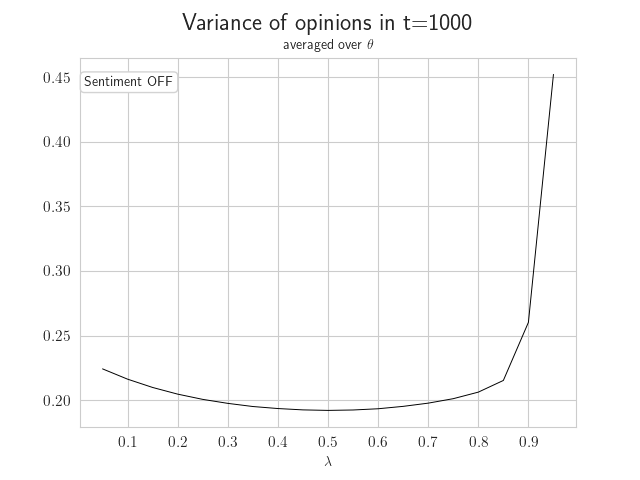

In [7]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}} \n \\normalsize{{averaged over {th}}}")

plt.plot([int(val)/100 for val in vals], var_l, c='black', lw=0.7)

plt.xticks([i*0.01 for i in range(10, 91, 10)])

plt.xlabel(l)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.924, 'Sentiment OFF', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)

plt.savefig('exploratory_figures/variance/lambda_SN.png')

<IPython.core.display.Javascript object>


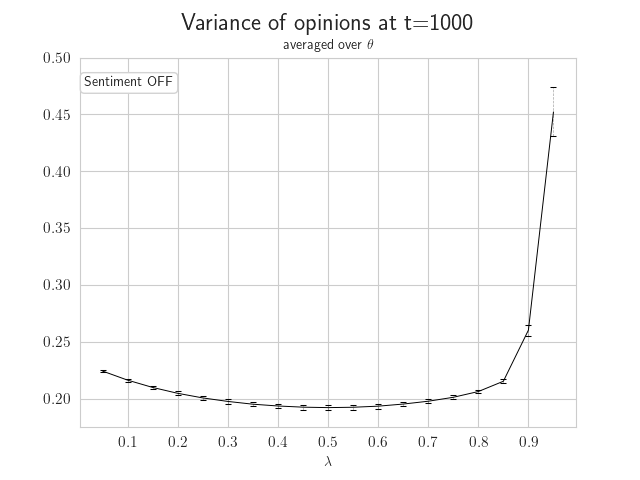

In [8]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions at t=1000}} \n \\normalsize{{averaged over {th}}}")

eb = plt.errorbar([int(val)/100 for val in vals], var_l, var_l_er, c='black', lw=0.7,
                  elinewidth=0.5, capsize=2, capthick=0.75)
eb[-1][0].set_linestyle('--')
eb[-1][0].set_alpha(0.35)

plt.xticks([i*0.01 for i in range(10, 91, 10)])
plt.ylim(bottom=0.175, top=0.5)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.922, 'Sentiment OFF', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)

plt.xlabel(l)
plt.savefig('exploratory_figures/variance_erbars/lambda_SN.png')

## conditional values

disaggregate by one more parameter to discover potential interaction effects between parameters.

In [9]:
# colomap for different values of variables that lambda is conditioned on
cmap = plt.cm.coolwarm(np.linspace(0.1, 0.9, 9))

### $\lambda|\theta$

In [10]:
n = len(var[0,0,:,:].flatten())
var_l_t = np.array([np.array([var[j,i,:,:].mean() for j in range(19)]) for i in range(9)])
var_l_t_er = np.array([
    np.array([
        np.std(var[j,i,:,:].flatten()) / np.sqrt(n) for j in range(19)
    ]) for i in range(9)
])

<IPython.core.display.Javascript object>


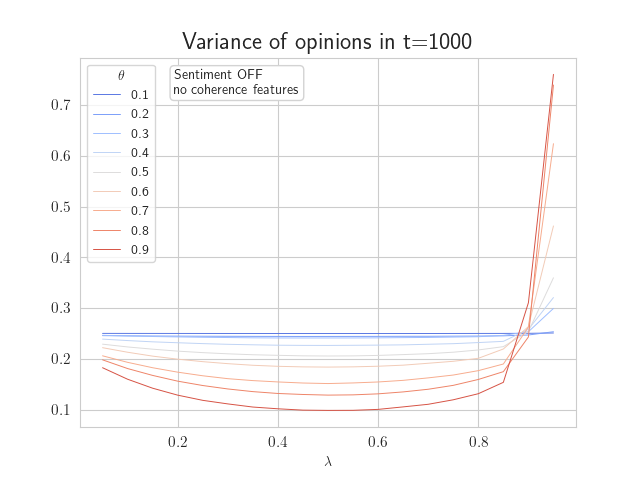

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [11]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}}")

x = [int(val)/100 for val in vals]

for i in range(9):
    plt.plot(x, var_l_t[i], c=cmap[i], lw=0.7, label=(i+1)/10)
    
plt.xlabel(l)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.19, 0.9025, 'Sentiment OFF \n no coherence features', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)

plt.legend(title=th, fontsize=10)

plt.savefig('exploratory_figures/variance/var_lambda_theta_SN_nocred.png')
# vectorised image format for publication
plt.savefig('exploratory_figures/variance/var_lambda_theta_SN_nocred.eps')

<IPython.core.display.Javascript object>


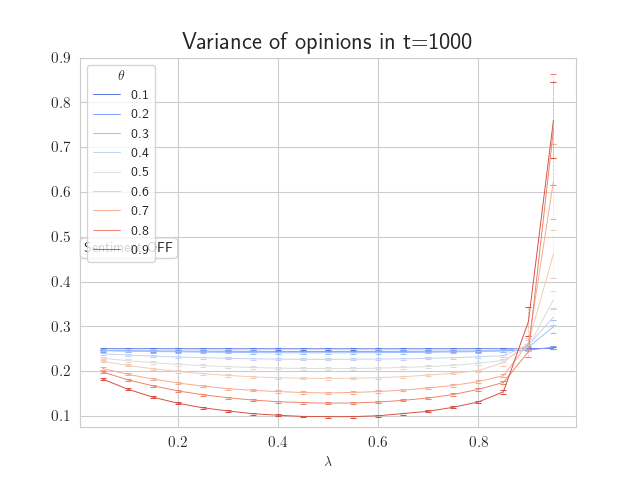

In [12]:
plt.figure()
plt.title('\LARGE{Variance of opinions in t=1000}')

x = [int(val)/100 for val in vals]

lines = list()
for i in range(9):
    eb = plt.errorbar(x, var_l_t[i], var_l_t_er[i], c=cmap[i], lw=0.7, label=(i+1)/10,
                      elinewidth=0.5, capsize=2, capthick=0.75)
    lines.append(eb[0])
    eb[-1][0].set_linestyle('--')
    eb[-1][0].set_alpha(0.45)
    
plt.xlabel('$\lambda$')
plt.ylim(bottom=0.075, top=0.9)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.475, 'Sentiment OFF', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)

labels = [i/10 for i in range(1,10)]
plt.legend(lines, labels, title='$\\theta$', fontsize=10, loc='upper left')

plt.savefig('exploratory_figures/variance_erbars/lambda_theta_SN.png')

## $\Theta$

Integrate statistics of interest $T$ (variance) to find unconditional statistics for different values of $\theta$ - both  for with and without sentiment.

Sums move in steps of $10^{-1}$, except lambda, which moves in steps of $5*10^{-2}$

$T(\theta) = \frac{1}{9^2\cdot 19}\sum_{\lambda=0.05}^{0.95}\sum_{\gamma=0.1}^{0.9}\sum_{\kappa=0.1}^{=0.9}T(\lambda, \theta, \gamma, \kappa)$

In [17]:
n = len(var[:,0,:,:].flatten())
var_th = np.array([var[:,i,:,:].mean() for i in range(9)])
var_th_er = np.array([np.std(var[:,i,:,:].flatten()) / np.sqrt(n) for i in range(9)])

<IPython.core.display.Javascript object>


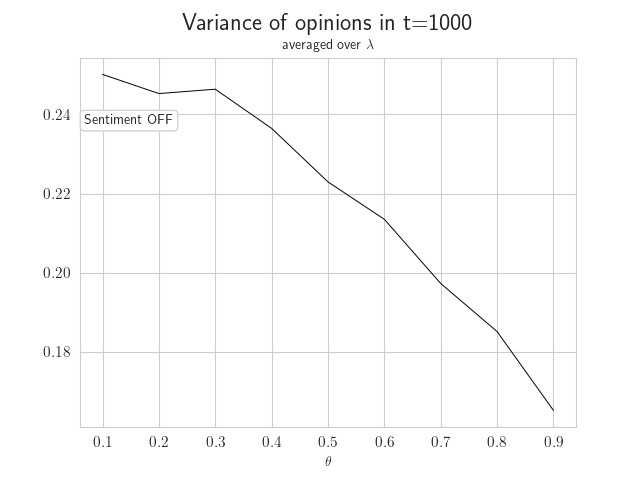

In [18]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}} \n \\normalsize{{averaged over {l}}}")

x = [i*0.1 for i in range(1,10)]

plt.plot(x, var_th, c='black', lw=0.7)
#plt.plot(x,0.236-0.04*np.array(x)**2, linestyle='--', lw=0.5)

plt.xticks([i*0.01 for i in range(10, 91, 10)])

plt.xlabel(th)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.82, 'Sentiment OFF', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)

plt.savefig('exploratory_figures/variance/theta_SN.png')

<IPython.core.display.Javascript object>


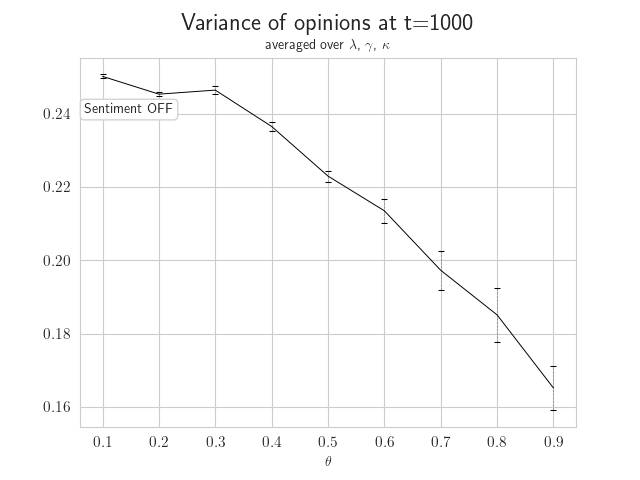

In [19]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions at t=1000}} \n \\normalsize{{averaged over {l}, {g}, {k}}}")

eb = plt.errorbar([i*0.1 for i in range(1,10)], var_th, var_th_er, c='black', lw=0.7,
                  elinewidth=0.5, capsize=2, capthick=0.75)
eb[-1][0].set_linestyle('--')
eb[-1][0].set_alpha(0.35)

plt.xticks([i*0.01 for i in range(10, 91, 10)])

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.85, 'Sentiment OFF', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)

plt.xlabel(th)
plt.savefig('exploratory_figures/variance_erbars/theta_SN.png')

### $\theta|\lambda$

Integrate only gamma and kappa. Any variable conditioned on $\lambda$ needs an extra colormap.

In [20]:
cmap_l = plt.cm.coolwarm(np.linspace(0.05, 0.95, 19))

In [21]:
var_t_l = np.array([np.array([var[j,i,:,:].mean() for i in range(9)]) for j in range(19)])

<IPython.core.display.Javascript object>


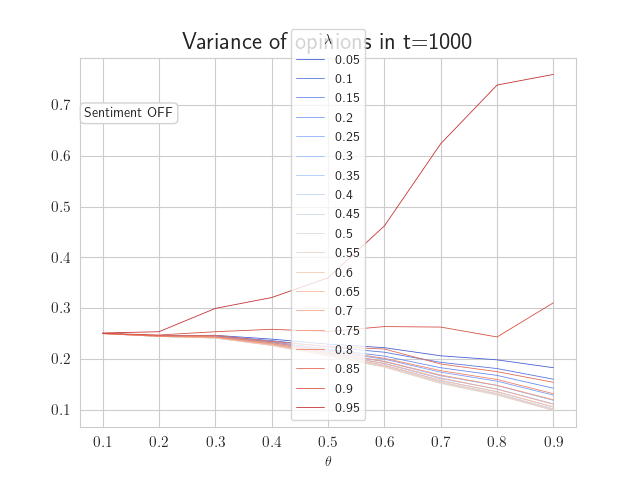

In [22]:
plt.figure()
plt.title(f"\LARGE{{Variance of opinions in t=1000}}")

x = np.linspace(0.1, 0.9, 9)

for i in range(19):
    plt.plot(x, var_t_l[i], c=cmap_l[i], lw=0.6, label=int(vals[i])/100)
    
plt.xlabel(th)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.84, 'Sentiment OFF', transform=ax.transAxes, bbox=props)
ax.tick_params(axis='both', labelsize=11)

plt.legend(title=l, fontsize=10)

plt.savefig('exploratory_figures/variance/theta_lambda_SN.png')